In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [4]:
df=pd.read_csv('Power Characterisation.csv')
df.head()

,mA,mW
0,10,0.00848
1,20,0.03047
2,30,0.06282
3,40,3.76500
4,50,11.98000


Lasing Threshold Current: 33.99 mA
Slope after threshold (k2): 0.777 W/A


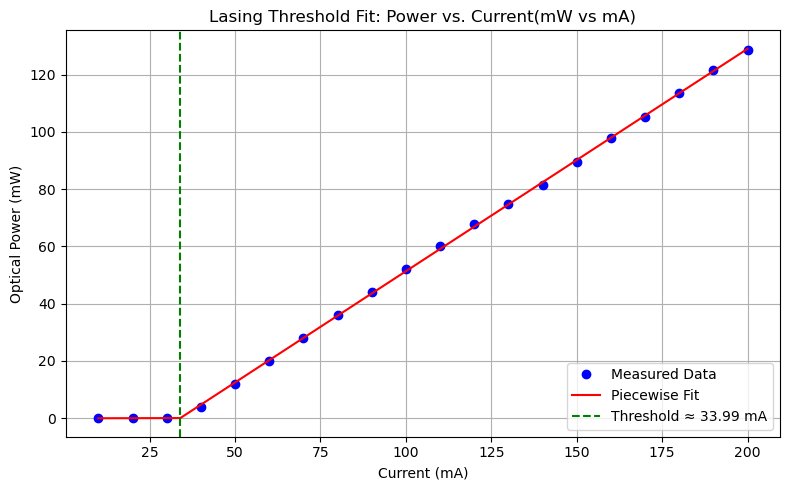

In [17]:

# Define data current and power
current = df['mA']  # in mA
power = df['mW']  # in mW

# Define a piecewise linear function
# k1 and k2 represent slopes of two different regions:
#k1 below lasing , k2 above lasing
#x0 is lasing threshold current

'''x0 — threshold current

y0 — power at threshold

k1 — slope before threshold

k2 — slope after threshold'''

def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x < x0, k1 * (x - x0) + y0,
                          k2 * (x - x0) + y0)

# Initial guess: [threshold_current, power_at_threshold, slope1, slope2]
initial_guess = [40, 3.765, 0, 0.7]
'''x0 = 40

y0 = 3.765

k1 = 0.005

k2 = 0.77
initial guess order and piecewise_linear order must,x is a variable
'''

# Fit the model
params, _ = curve_fit(piecewise_linear, current, power, p0=initial_guess)

#params (also called popt):This is an array of the best-fit parameter values for the model.
'''_ (underscore)
The second value returned by curve_fit is the covariance matrix of the parameters.

It's useful for estimating the uncertainties (errors) of the fitted parameters.

In this case, the underscore _ is used to ignore it because it’s not needed for basic fitting.'''

# Extract fitted parameters
x0, y0, k1, k2 = params
print(f"Lasing Threshold Current: {x0:.2f} mA")
print(f"Slope after threshold (k2): {k2:.3f} W/A")

# Generate fit curve
current_fit = np.linspace(min(current), max(current), 500)
power_fit = piecewise_linear(current_fit, *params)
# *params means "unpack the fitted parameters" (like x0, y0, k1, k2).

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(current, power, 'bo', label='Measured Data') #no fit,below threshold
plt.plot(current_fit, power_fit, 'r-', label='Piecewise Fit') # linear fit after threshold
plt.axvline(x=x0, color='g', linestyle='--', label=f'Threshold ≈ {x0:.2f} mA')
plt.xlabel('Current (mA)')
plt.ylabel('Optical Power (mW)')
plt.title('Lasing Threshold Fit: Power vs. Current(mW vs mA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
print(params)

[3.39924784e+01 7.19383386e-02 2.71686172e-03 7.76595587e-01]


In [14]:
print(*params)

33.992478410192035 0.07193833859736526 0.0027168617216890506 0.7765955873215736
